## 決策樹

![決策樹](./pic/decision_tree_2.png)

1. Root Node: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
2. Splitting: It is a process of dividing a node into two or more sub-nodes.
3. Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node.
4. Leaf/ Terminal Node: Nodes do not split is called Leaf or Terminal node.
5. Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
6. Branch / Sub-Tree: A sub section of entire tree is called branch or sub-tree.
7. Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

## 分類樹與回歸樹間的主要異同

* 回歸樹(Regression trees)用於因變數為連續性的，分類樹(Classification trees)用於因變數為類別性。
* 以回歸樹為例，經由訓練資料得到的結果(在葉節點)為區域中的觀測平均值。
* 以分類樹為例，經由訓練資料得到的結果為葉節點的值為落在決策區域所決定。
* 兩者都將自變數分割成獨立/不重疊的預測區域。
* 兩者都採用「top-down greedy」方法，又稱為「遞迴二元分割」(recursive binary splitting)。
* 分割程序一直到使用者定義的停止條件後才停止。
* 在二種方法中，分割程序經由停止條件達到完全長成的樹，但這些完全長成樹可能造成Overfit資料，對未知資料的預測能力差。因此，可使用修剪樹(tree pruning)技術來解決overfitting問題。

## 3.決策樹如何決定從哪裡分割？

決策樹的分割決定深深影響決策樹的準確度，對分類與回歸數而言，決策準則不同。決策樹使用多項演算法將一個節點分割成二或更多的子節點。分割的準則將增加子節點的同質性。換言之，針對目標變數，節點的純度增加。決策樹針對所有可能的變數，選擇分割以形成最純的子節點。演算法根據目標變數決定，以下是最重要的四種分割演算法：



### Gini Index
Gini指數主要是在一個母體中隨機選取二個物件，他們必須是相同類型，及如果母體是純的，則其機率為1。

1. Gini Index可用於類別目標變數(categorical target variable)，如「成功」或「失敗」。
2. Gini Index僅執行二元分割(Binary splits)。
3. Gini Index值越高，純度越高。
4. CART (分類與回歸樹) 使用Gini方法論來執行二元分割

對一個分割計算Gini的步驟

1. 計算每一個子樹(sub-nodes)的Gini，$p^2+q^2$，(p = 1-q)，p, q是「成功」與「失敗」的機率。
2. 對每一個分割節點計算權重Gini分數。

## 案例：
展示以上的計算範例，依據目標變數(是否玩蟋蟀)來分類學生。下圖說明依據二個屬性，性別及班級，來分割資料。使用Gini Index來找出分割點。(較高的同質子樹)


![example tree](./pic/Decision_Tree_Algorithm1.png)

### 依性別分割

In [21]:
# for Female node
gini_femail = 0.2*0.2 + 0.8*0.8
# for male node
gini_male = 0.65*0.65 + 0.35*0.35
# weighted gini index
gini_gender = (10/30)*gini_femail + (20/30)*gini_male

In [22]:
gini_gender

0.5900000000000001

### 依班級分割

In [23]:
# for class IX
gini_ix = 0.43*0.43 + 0.57*0.57
# for class X
gini_x = 0.56*0.56 + 0.44*0.44
# weighted gini index
gini_class = (14/30)*gini_ix + (16/30)*gini_x

In [24]:
gini_class

0.5084133333333334

依據Gini Index的計算，應該依性別來分割。

## Chi-Square

另一種演算法是依據父節點與子節點間的統計的顯著性。計算目標變數的觀察與期望頻率的標準差的平方和。

1. 可用於類別目標變數，「成功」或「失敗」。
2. 可執行二個或更多分割
3. Chi-Square值越高，表示父節點與子節點間的統計顯著性越大

### 每個節點的Chi-Square計算

1. Chi-Square = $\sqrt\frac{(Actual-Expected)^2}{Expected}$

2. 建立的樹稱為 CHAID樹 (Chi-square Automatic Interaction Detector)


### 依性別分割

1. 針對女性，共有10為學生，2位玩蟋蟀，8位不玩。
2. 計算玩蟋蟀與不玩蟋蟀的學生期望值，共30位學生，15位學生玩蟋蟀，期望值為0.5。故10位女生中應有5位玩蟋蟀。
3. 計算差值，「玩蟋蟀」($2-5=-3$)，「不玩蟋蟀」($8-5=3$)
4. 計算Chi-Square

** 同樣過程計算男性玩蟋蟀的Chi-Square，獲得以下結果

性別 | 玩蟋蟀 | 不玩蟋蟀 | 總人數 | 玩蟋蟀期望值 | 不玩蟋蟀期望值 | 玩蟋蟀差值 | 不玩蟋蟀差值
----|-------|---------|-------|------------|--------------|----------|-----------
女   | 2    |    8    |   10  |    5       |      5       |     -3   |    3    
男   | 13   |    7    |   20  |    10      |      10      |     3    |    -3 

In [18]:
# Chi-Square value
import numpy as np
np.sqrt((2-5)**2/5)+np.sqrt((8-5)**2/5)+np.sqrt((13-10)**2/10)+np.sqrt((7-10)**2/10)

4.5806481691007752

### 依班級分割

性別 | 玩蟋蟀 | 不玩蟋蟀 | 總人數 | 玩蟋蟀期望值 | 不玩蟋蟀期望值 | 玩蟋蟀差值 | 不玩蟋蟀差值
----|-------|---------|-------|------------|--------------|----------|-----------
IX   | 6    |    8    |   14  |   7       |      7       |     -1   |    1    
X   | 9   |    7    |   16  |    8      |      8      |     1    |    -1 

In [15]:
# Chi-Square value
np.sqrt((6-7)**2/7)+np.sqrt((8-7)**2/7)+np.sqrt((9-8)**2/8)+np.sqrt((7-8)**2/8)

1.4630357272050019

### 結論

|    |玩蟋蟀|不玩蟋蟀|總和  |
|--- |-----|-------|--- |
|性別|     |      | 4.58|
|班級|     |      |1.46 |

## Information Gain

以下A圖較B圖（較C圖）需要更多的資訊去描述，C可稱最純，B其次，C最不純。可以推論出不純的資料需要較多的資訊來描述它。

![information gain](./pic/Information_Gain_Decision_Tree2.png)

資訊理論中使用 Entropy 來描述系統的非組織的程度。如果系統的組成非常同質，則 $Entropy = 0$，如果系統不同組成各佔一半，則 $Entropy = 1$。

Entropy 公式：

$$ -p*log_2p-q*log_2q $$
* p, q 代表「成功」與「失敗」的機率
* $Entropy$可用來分割類別，$Entropy$越低，越可分割成一類。

### 依 $Entropy$ 執行分割

1. 計算父節點 $Entropy_{parent}$
2. 計算每一個可能的分割節點 $Entropy_{node}$
3. 選取最小 $Entropy$ 的節點進行分割

#### 學生玩蟋蟀案例

In [3]:
import numpy as np
# Entropy for parent node 
-(15/30)*np.log2(15/30)-(15/30)*np.log2(15/30) 
# result 1 shows that it is a impure node.

1.0

In [5]:
# Entropy for Female node 
-(2/10)* np.log2(2/10) - (8/10)*np.log2(8/10) 

0.72192809488736231

In [6]:
# for male node
-(13/20)*np.log2(13/20) - (7/20)*np.log2(7/20)

0.93406805537549098

In [7]:
# Entropy for split Gender = Weighted entropy of sub-nodes 
(10/30)*0.72 + (20/30)*0.93

0.86

In [8]:
# Entropy for Class IX node, 
-(6/14) * np.log2(6/14) - (8/14) * np.log2(8/14) 

0.98522813603425152

In [9]:
#for Class X node,  
-(9/16)* np.log2(9/16) - (7/16)* np.log2(7/16)

0.98869940828849745

In [11]:
#Entropy for split Class 
(14/30)*0.98 + (16/30)*0.99

0.9853333333333334

### $$information-gain = 1-Entropy$$

## Reduction in Variance

降低變異量可以用來針對連續性變數來執行分割。較低的變異量可作為分割資料的準則。
$$variance = \sum_{i=1}^{n}\frac{({x_i-\overline X})^2}{n}$$
* $\overline X = \frac{\sum_{i=1}^{n}x_i}{n}$，$\overline X$ 表示 $x_i$ 平均值
* $x_i$ 是觀察值，n 為資料數

### 計算變異量的步驟：
* 計算每個節點的變異量
* 計算分割決定的所有變異量的權重平均

### 計算範例

## 防止 overfit 問題

* 設定 tree size 限制
* 修剪樹 (tree pruning)

### 重要參數
* Minimum samples for a node split /分割節點的最少資料量
  * 考慮分割節點的資料量
  * 資料量的限制值越高，不容易建立較複雜模式
  * 太高的值造成unferfitting
* Minimum samples for a terminal node (leaf)/葉節點的最少資料量
  * 設定葉節點的最少資料量限制
  * 用來控制 overfitting 問題
  * 較小值可用來處理 imbalanced 類別問題
* Maximum depth of tree (vertical depth)/樹的最大深度
  * 樹的最大深度
  * 較大的深度造成複雜度高模型
  * 可利用 cross-validation來調整樹的深度
* Maximum number of terminal nodes/葉節點最大數量
* Maximum features to consider for split/分割的最大屬性數量
  * 屬性的數量，可以由隨機選取屬性
  * $\sqrt{屬性數量}$可作為一個參考值，$30-40$%的屬性總數量為宜。
  * 較高的值可能造成 overfitting問題。

## 修剪樹(tree pruning)

### 簡單的運作概念

1. 建立一個較大深度的樹
2. 與上一層比較，獲得較差結果
3. 決定捨棄葉節點

## 運用sklearn進行分類數

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()

In [3]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [8]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [9]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

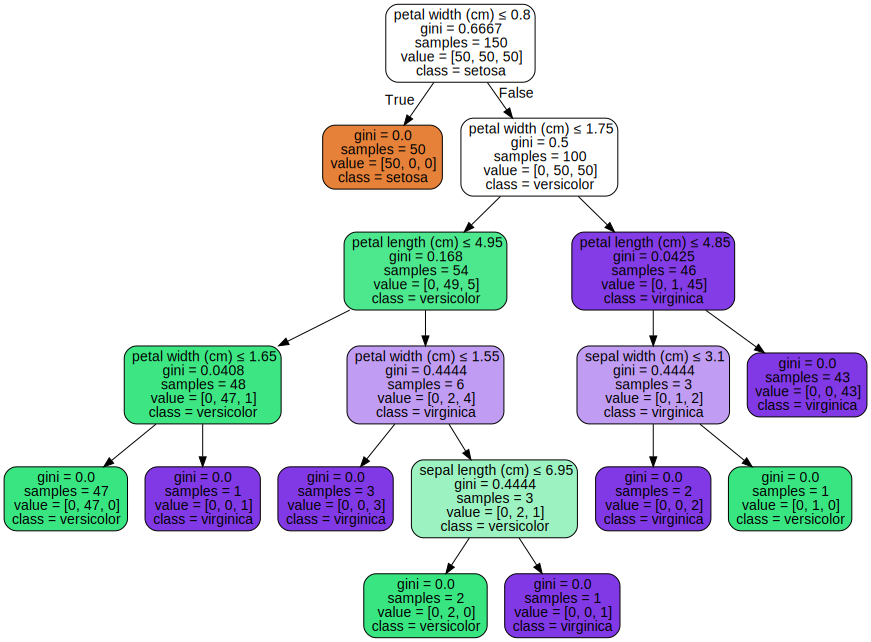

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [11]:
clf.predict(iris.data[:1, :])

array([0])

In [12]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])